In [1]:
#Import lib

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import eda_helper_functions
import seaborn as sns

# 2 Read Training Set

In [3]:
file_path=r"C:\Users\Bhagyashree\OneDrive\Desktop\Flights_predictions\Data\train.csv"
train_set=pd.read_csv(file_path)

In [4]:
train_set

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-09,Kolkata,Banglore,15:30:00,18:05:00,155,0.0,no info,5224
1,Multiple Carriers,2019-03-21,Delhi,Cochin,09:45:00,16:10:00,385,1.0,no info,7242
2,Multiple Carriers,2019-06-27,Delhi,Cochin,09:15:00,19:00:00,585,1.0,no info,11622
3,Jet Airways,2019-06-03,Banglore,Delhi,07:10:00,10:10:00,180,0.0,In-flight meal not included,5769
4,Goair,2019-03-03,Delhi,Cochin,07:00:00,12:50:00,350,1.0,no info,7378
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-06-03,Delhi,Cochin,14:10:00,17:10:00,180,0.0,no info,6934
636,Indigo,2019-03-21,Delhi,Cochin,09:10:00,21:00:00,710,1.0,no info,8285
637,Indigo,2019-03-03,Delhi,Cochin,02:35:00,08:30:00,355,1.0,no info,13790
638,Multiple Carriers,2019-03-09,Delhi,Cochin,07:00:00,19:45:00,765,1.0,no info,15237


In [5]:
train_set.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train_set=train_set.assign(**{
     col : pd.to_datetime(train_set.loc[:,col],dayfirst=True)
     for col in ['date_of_journey','dep_time','arrival_time']

})


In [7]:
train_set.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [9]:
train_set.describe(include='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,629.070312,0.792188,8750.360937
std,496.921622,0.656449,4221.985626
min,75.000000,0.000000,2017.000000
25%,170.000000,0.000000,5188.250000
50%,502.500000,1.000000,8033.000000
75%,945.000000,1.000000,11753.000000
max,2295.000000,3.000000,31825.000000


In [10]:
(
    train_set
    .assign(total_stops=train_set['total_stops'].astype(object))
    .describe(include='O')
)
    
    

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,no info
freq,210,270,270,346.0,505


In [11]:
## Outlier

In [12]:
forest=IsolationForest(n_estimators=10,random_state=42)

In [13]:
(
    train_set
    .assign(outlier=forest.fit_predict(train_set
        .drop(columns='price')
        .select_dtypes(include ='number')))
        .query("outlier== -1")
        .duration
        .describe()
        
    
)

count     217.000000
mean      964.423963
std       608.658981
min        75.000000
25%       265.000000
50%      1195.000000
75%      1470.000000
max      2295.000000
Name: duration, dtype: float64

In [14]:
#pair plot

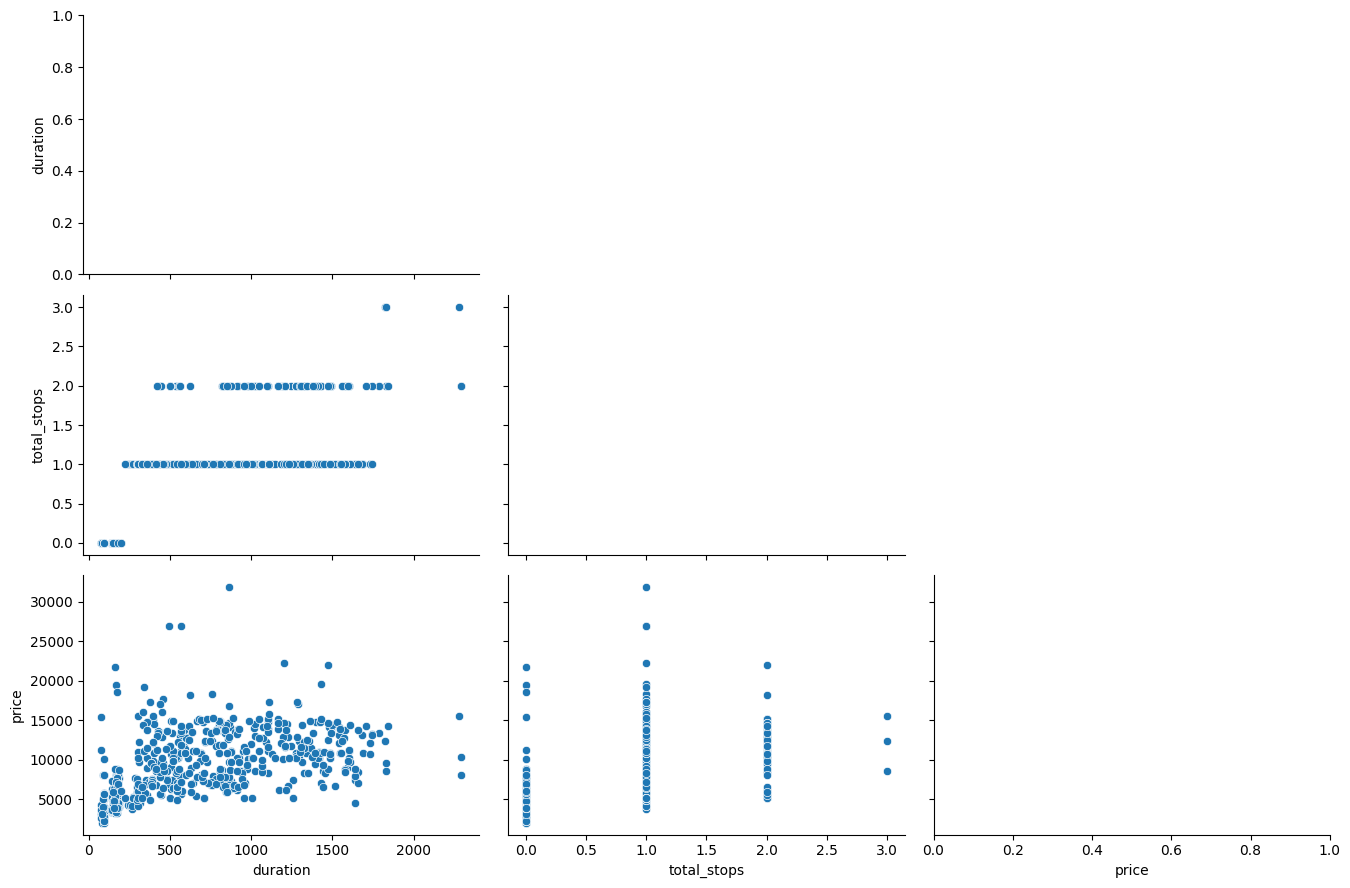

In [15]:
eda_helper_functions.pair_plots(train_set)


# Coreelation_analysis

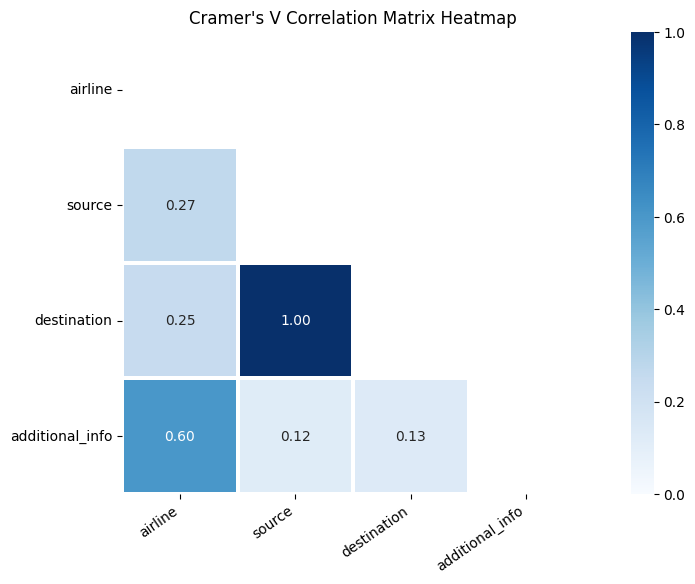

In [16]:
eda_helper_functions.cramersV_heatmap(train_set)


In [17]:
# from oberservation we can see that price vs duration are highly correlated 

# Detailed Analysis

In [18]:
train_set.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [19]:
train_set.airline


0                 Indigo
1      Multiple Carriers
2      Multiple Carriers
3            Jet Airways
4                  Goair
             ...        
635            Air India
636               Indigo
637               Indigo
638    Multiple Carriers
639               Indigo
Name: airline, Length: 640, dtype: object

In [20]:
eda_helper_functions.cat_summary(train_set,'airline')

0                 Indigo
1      Multiple Carriers
2      Multiple Carriers
3            Jet Airways
4                  Goair
             ...        
635            Air India
636               Indigo
637               Indigo
638    Multiple Carriers
639               Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,210


,count,percentage
category,,
Jet Airways,210,0.328125
Indigo,136,0.212500
Air India,100,0.156250
Multiple Carriers,81,0.126562
Spicejet,48,0.075000
Vistara,35,0.054688
Air Asia,23,0.035937
Goair,6,0.009375
Vistara,1,0.001563


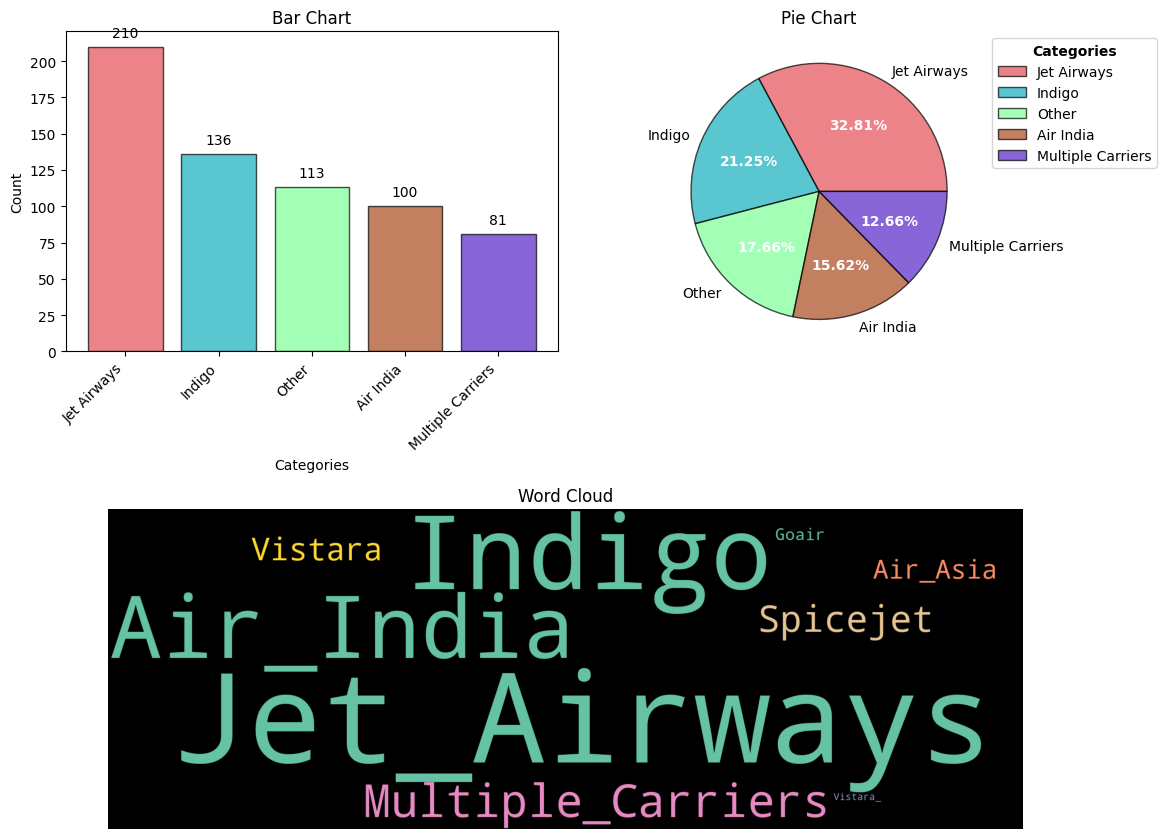

In [21]:
eda_helper_functions.cat_univar_plots(train_set,'airline',k=4)

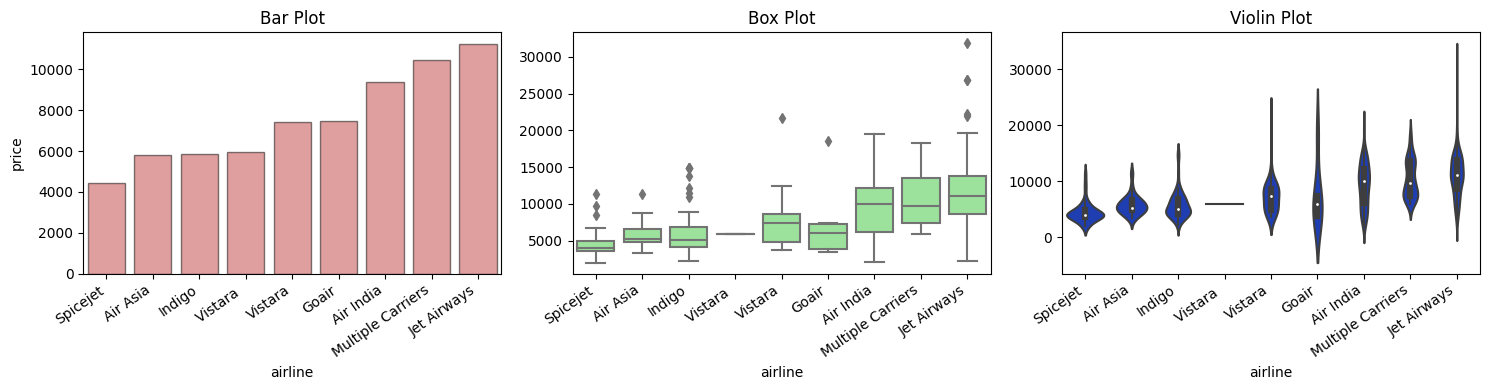

In [22]:
eda_helper_functions.num_cat_bivar_plots(
    data=train_set,
    num_var="price",
    cat_var="airline"
)

In [23]:
eda_helper_functions.num_cat_hyp_testing(train_set,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 41.201566228199695
- p-value              : 5.710008052390595e-53
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 255.2383573317714
- p-value              : 1.3351806346234263e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


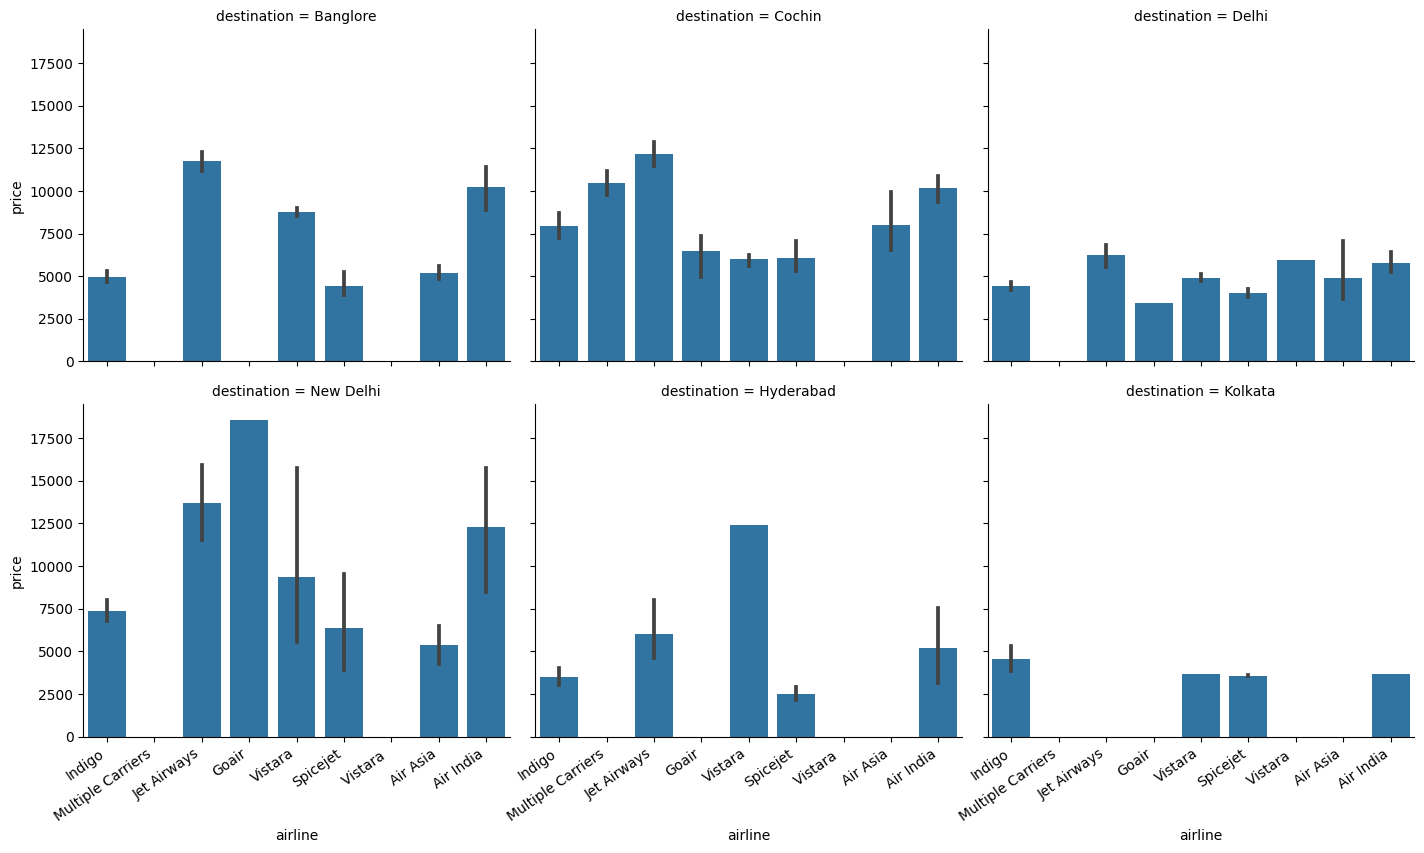

In [28]:
airline_grid = sns.FacetGrid(
	data=train_set,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train_set.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

## As we observe that airline and price are highly associated 

# Date_of_journey

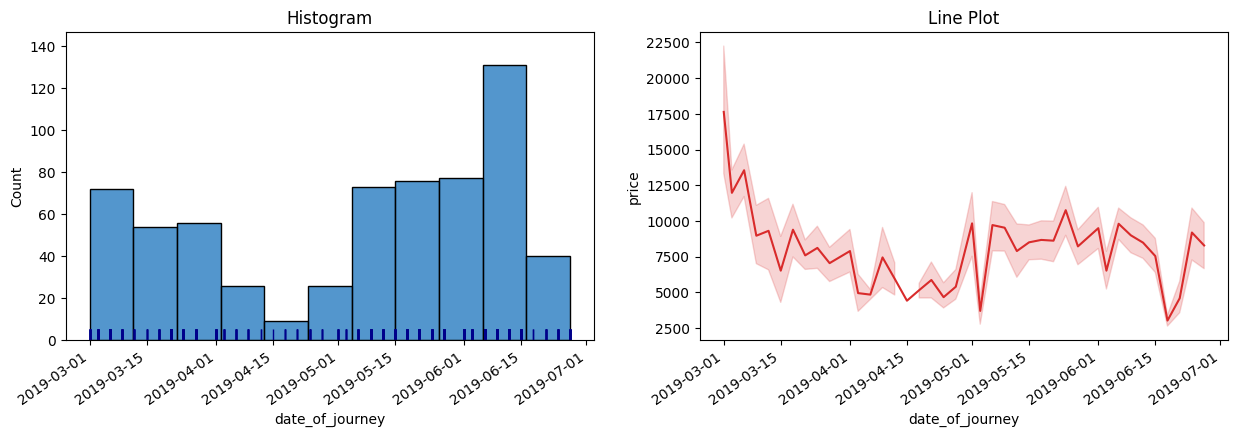

In [33]:
eda_helper_functions.dt_univar_plots(
	data=train_set,
	var="date_of_journey",
	target="price"
)

# Oberservations
## in summaer moths may more flights
## from march to april average price are decresing 
## then from may to june price are increasing

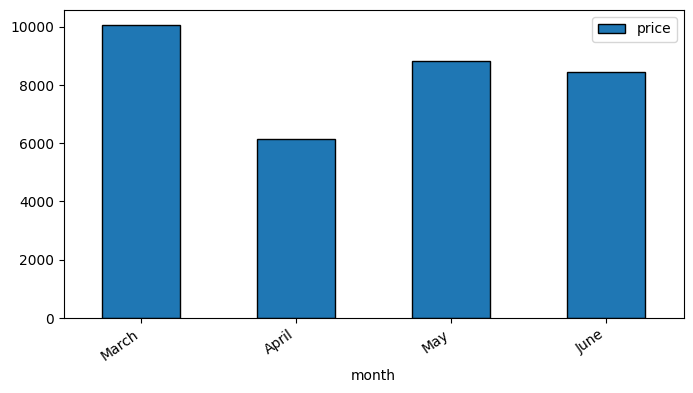

In [37]:
(
	train_set
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca() #get currunt axis
eda_helper_functions.rotate_xlabels(ax)

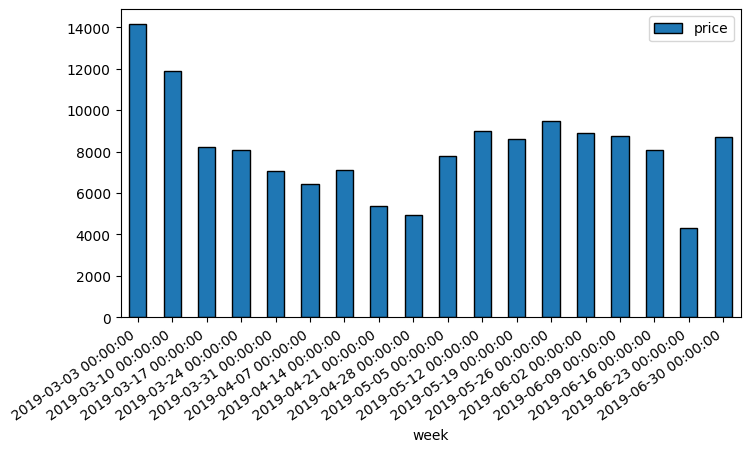

In [38]:
(
	train_set
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca() #get currunt axis
eda_helper_functions.rotate_xlabels(ax)

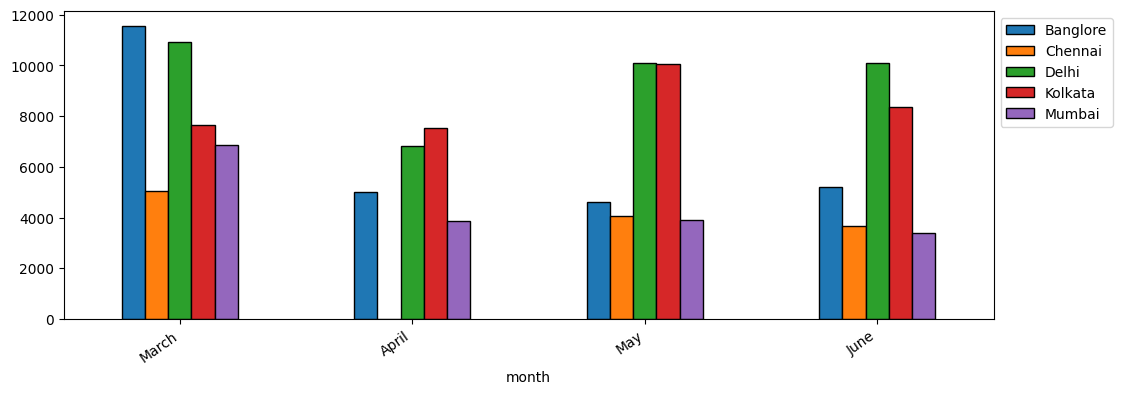

In [39]:
(
	train_set
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

# dep_time

In [40]:
train_set.dep_time

0     2025-06-16 15:30:00
1     2025-06-16 09:45:00
2     2025-06-16 09:15:00
3     2025-06-16 07:10:00
4     2025-06-16 07:00:00
              ...        
635   2025-06-16 14:10:00
636   2025-06-16 09:10:00
637   2025-06-16 02:35:00
638   2025-06-16 07:00:00
639   2025-06-16 14:25:00
Name: dep_time, Length: 640, dtype: datetime64[ns]